In [40]:
import sys, os

MARIPOSA_PATH = "/home/yizhou7/mariposa/"

sys.path.append(MARIPOSA_PATH + "src")
os.chdir(MARIPOSA_PATH)

from utils.plot_utils import *
import numpy as np
from bench.consts import *
from utils.system_utils import get_name_hash

def get_fix_ranks(bm: BenchMeta):
    data = []

    for q in bm.members:
        if q in verus_rd1_ranks:
            fixes = verus_rd1_ranks[q]
        elif q in mariposa_rd1_ranks:
            fixes = mariposa_rd1_ranks[q]
        else:
            data.append((10000, 10000))
            continue
        min_rank = min(fixes.values())
        data.append((min_rank, len(fixes)))

    return np.array(data)

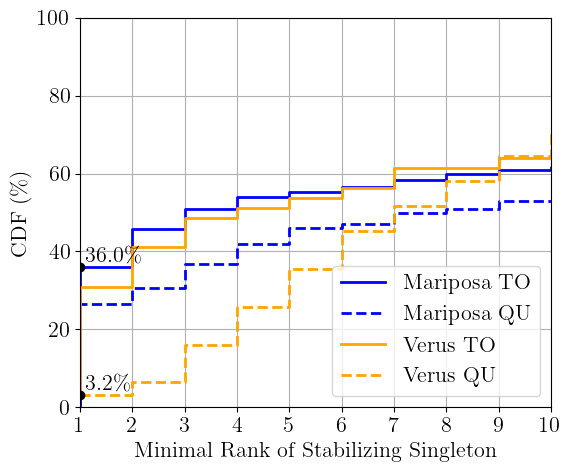

In [43]:
fig, ax = plt.subplots(figsize=(6, 5))  # Figure size (width, height)

for meta in METAS:
    data = get_fix_ranks(meta)
    min_fixes = data[:, 0]
    min_fixes = np.sort(min_fixes)
    # assert len(num_fixes) == len(best_ranks)

    cdf = np.arange(1, len(min_fixes) + 1) * 100 / len(min_fixes)
    ax.step(
        min_fixes,
        cdf,
        where="post",
        label=meta.full_name(),
        color=meta.color,
        linestyle=meta.line_style,
        linewidth=2,
    )

    if meta == MP_TO or meta == VS_QU:
        i = np.argmax(min_fixes > 1) - 1
        ax.plot(min_fixes[i], cdf[i], marker="o", color="black")
        ax.text(
            min_fixes[i] + 0.1,
            cdf[i] + 1,
            f"{cdf[i]:.1f}\%",
            color="black",
        )

plt.xlabel("Minimal Rank of Stabilizing Singleton")
plt.xlim(1, 10)
plt.xticks(np.arange(1, 11, 1))
plt.ylim(0, 100)
plt.ylabel("CDF (\%)")
plt.grid(True)
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("fig/debugger/singleton_ranks.pdf", dpi=300, bbox_inches="tight", pad_inches=0.1)
# plt.close()

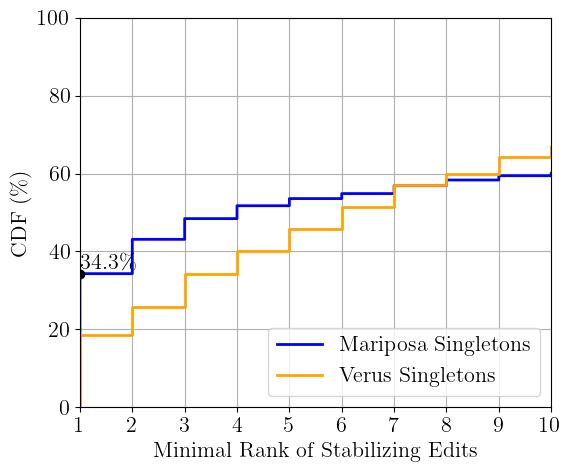

In [42]:
fig, ax = plt.subplots(figsize=(6, 5))  # Figure size (width, height)

verus_round2 = []
mariposa_round2 = []

for q, fixes in verus_rd2_ranks.items():
    if len(fixes) == 0:
        continue
    if min(fixes.values()) == -1:
        continue

    verus_round2.append((min(fixes.values()), len(fixes)))

while len(verus_round2) < 17:
    verus_round2.append((10000, 10000))

for q, fixes in mariposa_rd2_ranks.items():
    if len(fixes) == 0:
        continue
    if min(fixes.values()) == -1:
        continue
    mariposa_round2.append((min(fixes.values()), len(fixes)))

while len(mariposa_round2) < 213:
    mariposa_round2.append((10000, 10000))

min_fixes = np.hstack([get_fix_ranks(MP_QU)[:, 0], get_fix_ranks(MP_TO)[:, 0]])
min_fixes = np.sort(min_fixes)
cdf = np.arange(1, len(min_fixes) + 1) * 100 / len(min_fixes)
ax.step(
    min_fixes,
    cdf,
    where="post",
    label="Mariposa Singletons",
    color="blue",
    linestyle="-",
    linewidth=2,
)

i = np.argmax(min_fixes > 1) - 1
ax.plot(min_fixes[i], cdf[i], marker="o", color="black")
ax.text(
    min_fixes[i],
    cdf[i] + 1,
    f"{cdf[i]:.1f}\%",
    color="black",
)

min_fixes = np.hstack([get_fix_ranks(VS_QU)[:, 0], get_fix_ranks(VS_TO)[:, 0]])
min_fixes = np.sort(min_fixes)
cdf = np.arange(1, len(min_fixes) + 1) * 100 / len(min_fixes)
ax.step(
    min_fixes,
    cdf,
    where="post",
    label="Verus Singletons",
    color="orange",
    linestyle="-",
    linewidth=2,
)

# data = np.array(datas["Mariposa"])
# min_fixes = data[:, 0]
# min_fixes = np.sort(min_fixes)

# cdf = np.arange(1, len(min_fixes) + 1) * 100 / len(min_fixes)
# ax.step(
#     min_fixes,
#     cdf,
#     where="post",
#     label="Mariposa Doubletons",
#     color="blue",
#     linestyle="--",
#     linewidth=2,
# )

# data = np.array(datas["Verus"])
# min_fixes = data[:, 0]
# min_fixes = np.sort(min_fixes)

# cdf = np.arange(1, len(min_fixes) + 1) * 100 / len(min_fixes)
# ax.step(
#     min_fixes,
#     cdf,
#     where="post",
#     label="Verus Doubletons",
#     color="orange",
#     linestyle="--",
#     linewidth=2,
# )

# i = np.argmax(min_fixes > 1) - 1
# ax.plot(min_fixes[i], cdf[i], marker="o", color="black")
# ax.text(
#     min_fixes[i] + 0.1,
#     cdf[i] - 8,
#     f"{cdf[i]:.1f}\%",
#     color="black",
# )

plt.xlabel("Minimal Rank of Stabilizing Edits")
plt.xlim(1, 10)
plt.xticks(np.arange(1, 11, 1))
plt.ylim(0, 100)
plt.ylabel("CDF (\%)")
plt.grid(True)
plt.legend(loc="lower right")
plt.tight_layout()

plt.savefig("fig/debugger/doubleton_ranks.pdf", dpi=300, bbox_inches="tight", pad_inches=0.1)
# plt.close()